In [2]:
# importing package matplotlib and pyplot is a submodule
import matplotlib.pyplot as plt

In [ ]:
#this is creating a new plot called "fig" and "ax" is the axis that we are plotting on
fig, ax = plt.subplots()

In [7]:
trial        = [1, 2, 3, 4, 5, 6]
first_block  = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
middle_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
last_block   = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

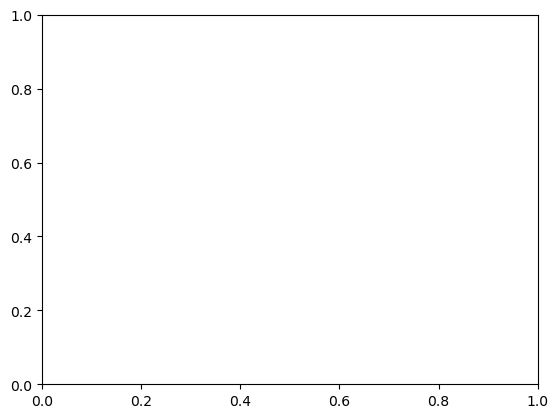

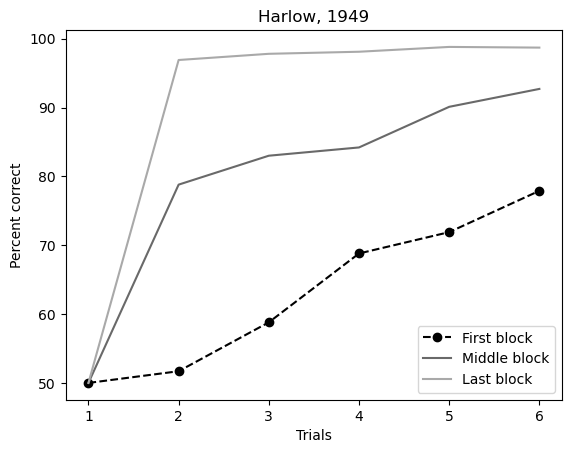

In [21]:
#making a 1x1 sfigure 
#fig, ax = plt.subplots()
#adding line graphs
fig, ax = plt.subplots()
ax.plot(trial, first_block, color = "black", marker = "o", linestyle='--', label="First block")
ax.plot(trial, middle_block, color = "dimgray", label="Middle block")
ax.plot(trial, last_block, color = "darkgray", label="Last block")
ax.legend()

ax.set_xlabel("Trials")
label = ax.set_ylabel("Percent correct")
title = ax.set_title("Harlow, 1949")

In [27]:
import pandas as pd

df = pd.read_csv("./data/visualization.csv", index_col = "subjectID")
df = df.dropna()
df.head()


,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,age_less_than_10,tractID,nodeID,fa
subjectID,,,,,,,,,,
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,0,0.199144
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,1,0.253789
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,2,0.300039
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,3,0.330740
subject_007,34,Male,Right,115.0,66.0,51.0,False,Left Thalamic Radiation,4,0.357632


In [36]:
df_age_groups = df.groupby(["age_less_than_10", "tractID", "nodeID"])
younger_fa = age_groups.mean(numeric_only = True).loc[True, "fa"]
older_fa   = age_groups.mean(numeric_only = True).loc[False, "fa"]
tracts     = df["tractID"].unique()

In [24]:
! pwd
# ! pwd is ! calling bash and pwd shows current path

/home/jovyan/curriculum/chang-visualization


In [32]:
younger_fa = df_age_groups.mean(numeric_only = True).loc[True, "fa"]
younger_fa.head() 

tractID                 nodeID
Callosum Forceps Major  0         0.204073
                        1         0.270865
                        2         0.314526
                        3         0.335978
                        4         0.355624
Name: fa, dtype: float64

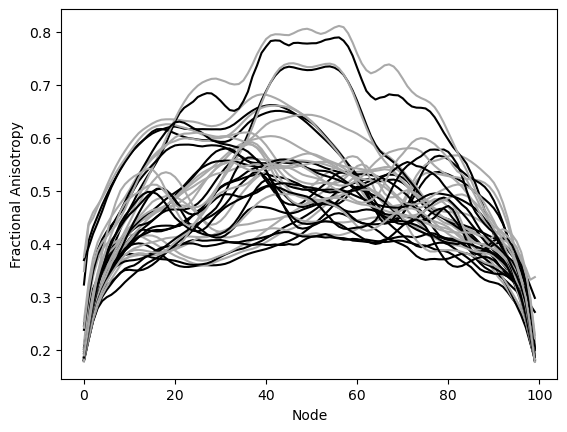

In [37]:
fig, ax = plt.subplots()
for tract in df["tractID"].unique():
    ax.plot(younger_fa[tract], color="black")
    ax.plot(older_fa[tract], color="darkgray")
ax.set_xlabel("Node IDs")
label = ax.set_ylabel("Fractional Anisotropy")



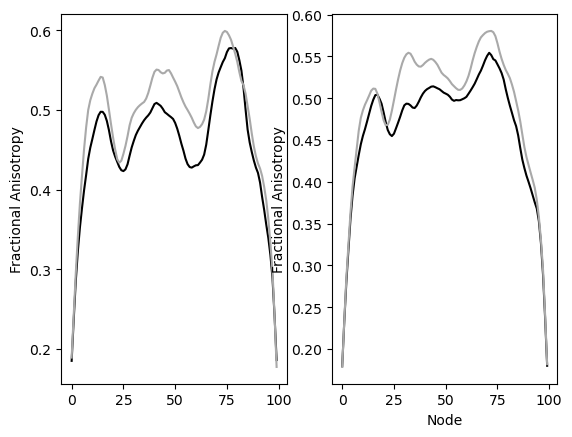

In [41]:
#one column two rows (green) 
#plotting younger vs older fa of the left arcuate and right arcuate
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.plot(younger_fa["Right Arcuate"], color = "black")
ax1.plot(older_fa["Right Arcuate"], color = "darkgray")
ax2.plot(younger_fa["Left Arcuate"], color = "black")
ax2.plot(older_fa["Left Arcuate"], color = "darkgray")
ax2.set_ylabel("Fractional Anisotropy")
ax1.set_ylabel("Fractional Anisotropy")
label = ax2.set_xlabel("Node")

NameError: name 'axes' is not defined

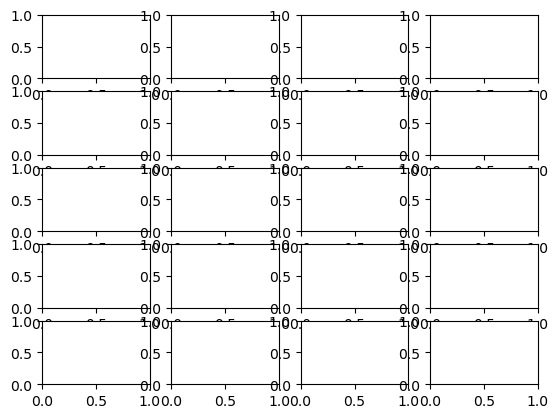

In [44]:
#figures 4 by 5 matrix  (still woriing)
fig, ax = plt.subplots(5, 4)
tract_list = df["tractID"].unique()
print


for i in range(20):
    tract = tract_list[i]
    axes.flat[i].plot(younger_fa[tract], color = "black")
    axes.flat[i].plot(younger_fa[tract], color = "darkgray")
    axes.flat[i].set_title(tract)
    axes.flat[i].axis("off")



In [47]:

for tract_idx in range(20):
    pathway = tracts[tract_idx]
    ax.flat[tract_idx].plot(younger_fa[pathway], color="black")
    ax.flat[tract_idx].plot(older_fa[pathway], color="darkgray")
    ax.flat[tract_idx].set_title(pathway)
    ax.flat[tract_idx].axis("off")

fig.set_tight_layout("tight")
fig.set_size_inches([10, 8])

In [49]:
import seaborn as sns
keep_cols = ["Age", "Gender", "Handedness", "IQ", "IQ_Matrix", "IQ_Vocab"]
df_subjects = df[keep_cols]
df_subjects.head()
        

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_007,34,Male,Right,115.0,66.0,51.0
subject_007,34,Male,Right,115.0,66.0,51.0
subject_007,34,Male,Right,115.0,66.0,51.0
subject_007,34,Male,Right,115.0,66.0,51.0
subject_007,34,Male,Right,115.0,66.0,51.0


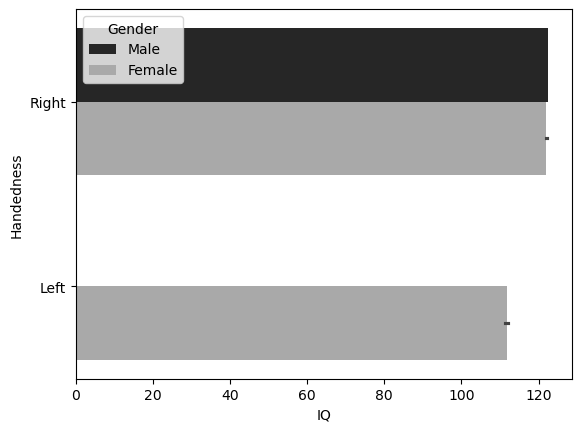

In [54]:
sns.barplot(
    data = df_subjects, 
    y = "Handedness",
    x = "IQ",
    hue = "Gender",
    palette = "dark:darkgray"
)
plt.show()

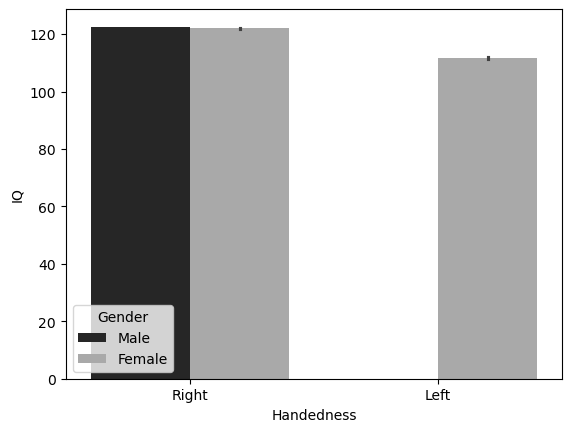

In [56]:
b = sns.barplot(data=df_subjects, x="Handedness", y="IQ", hue="Gender", palette = "dark:darkgray")

In [ ]:
fig, ax = plt.subplots(1, 2)
g = sns.swarmplot(data=df_subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[0], palette = "dark:darkgray")
g = sns.violinplot(data=df_subjects, x="Handedness", y="IQ", hue = "Handedness", ax=ax[1], palette = "dark:darkgray")

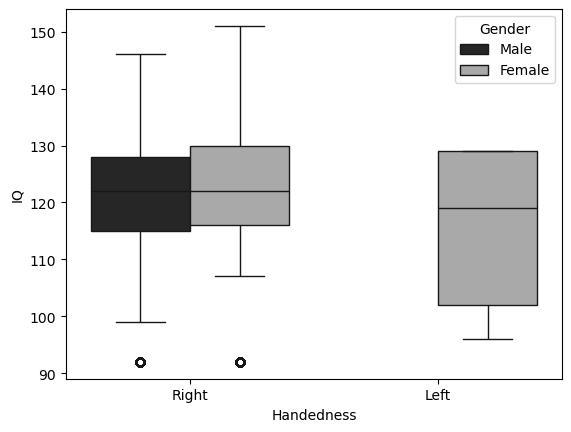

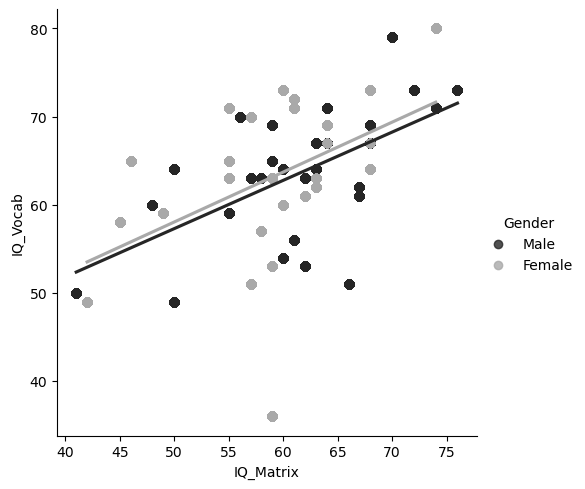

In [60]:
g = sns.boxplot(data=df_subjects, x="Handedness", y="IQ",     hue = "Gender",  palette = "dark:darkgray")

g = sns.lmplot(data=df_subjects, x="IQ_Matrix", y="IQ_Vocab", hue="Gender", palette = "dark:darkgray")

In [ ]:
#kwargs is keyworded arguments 

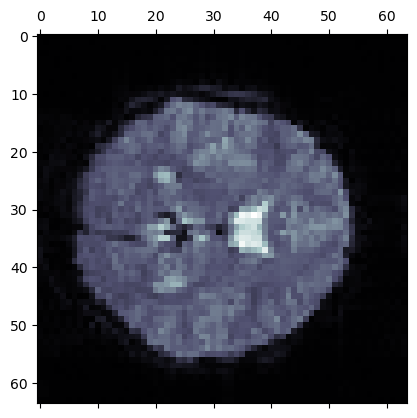

In [64]:
#visualizing MRI slices
#! pip install ndslib
import numpy as np
from ndslib import load_data
bold = load_data("bold_numpy", fname="bold.npy")
bold.shape
fig, ax = plt.subplots()
im = ax.matshow(np.mean(bold, -1)[:, :, 10], cmap="bone")